In [1]:
import pandas as pd
import numpy as np
from pandas.core.computation.check import NUMEXPR_INSTALLED

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense

In [8]:
df=pd.read_csv("^spx_d.csv")
df.head()

,Date,Open,High,Low,Close,Volume,Tomorrow,Target
0,1990-01-02,353.40,359.69,351.98,359.69,90038889.0,358.76,0
1,1990-01-03,359.69,360.59,357.89,358.76,106850000.0,355.67,0
2,1990-01-04,358.76,358.76,352.89,355.67,98333333.0,352.20,0
3,1990-01-05,355.67,355.67,351.35,352.20,88072222.0,353.79,1
4,1990-01-08,352.20,354.24,350.54,353.79,77838889.0,349.62,0


In [16]:
# Train a GradientBoosting

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

data = pd.read_csv('^spx_d.csv')
model = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, max_depth=3)

train = df.iloc[:-100]
test = df.iloc[-100]

predictors = ["Open", "High","Low","Close"]
model.fit(train[predictors], train["Target"])

GradientBoostingRegressor(n_estimators=1000)

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Load data
data = pd.read_csv('^spx_d.csv')

# Define predictors and target variable
predictors = ["Open", "High", "Low", "Close"]
target = "Target"

# Split data into train and test sets
train = data.iloc[:-100]
test = data.iloc[-100:]

# Fit the model on the training data
model = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, max_depth=3)
model.fit(train[predictors], train[target])

# Generate predictions on the test set
preds = model.predict(test[predictors])

# Calculate mean squared error
mse = mean_squared_error(test[target], preds)

print("Mean squared error:", mse)


Mean squared error: 0.31692027030201975


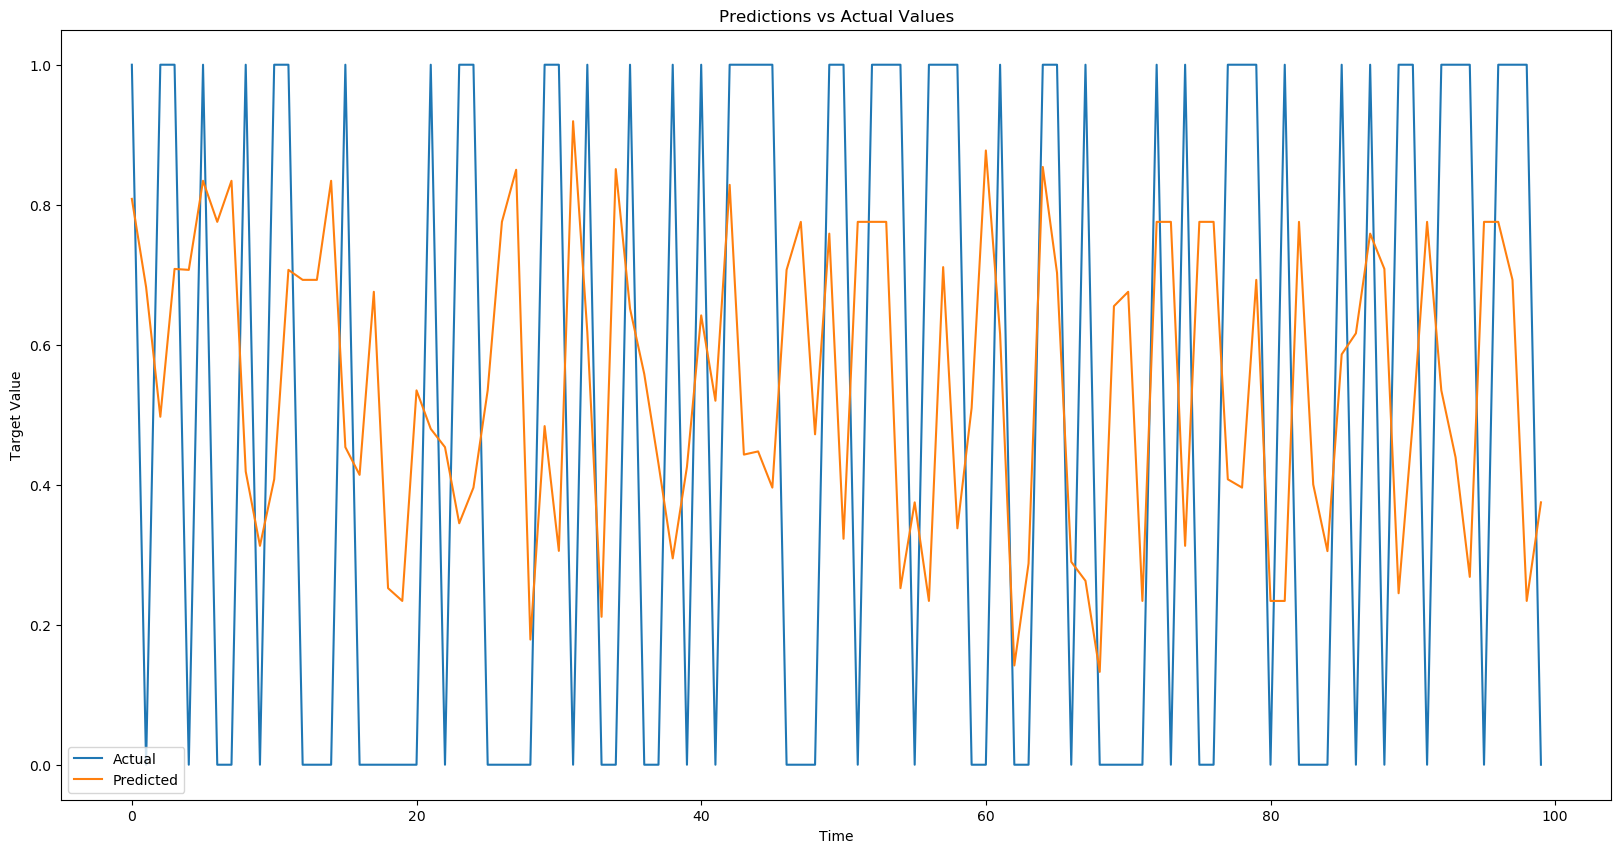

In [22]:
# Plot our predictions
 
import matplotlib.pyplot as plt

# Plot actual values
plt.plot(test["Target"].values, label="Actual")

# Plot predicted values
plt.plot(preds, label="Predicted")

# Set plot title and labels
plt.title("Predictions vs Actual Values")
plt.xlabel("Time")
plt.ylabel("Target Value")

# Add legend
plt.legend()

# Show plot
plt.show()


In [23]:
#Backtesting System
#Prediction function

def predict(train, test, predictors, model):
        model.fit(train[predictors], train[target])
        preds = model.predict(test[predictors])
        preds = pd.Series(preds, index=test.index, name="Predictors")
        combined = pd.concat([test["Target"], preds], axis=1)
        return combined

# Print the predicted function
combined = predict(train, test, predictors, model)
print(combined)

      Target  Predictors
8277       1    0.793587
8278       0    0.683093
8279       1    0.559133
8280       1    0.693049
8281       0    0.716405
...      ...         ...
8372       0    0.803971
8373       1    0.803971
8374       1    0.719459
8375       1    0.211907
8376       0    0.334302

[100 rows x 2 columns]


In [24]:
# Backtesting function
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
        
    return pd.concat(all_predictions)

In [25]:
  #backtest for ^spx_d.csv, the model, aand the predictions that were created earlier
    
predictions = backtest(df, model, predictors)

In [26]:
predictions["Predictors"].value_counts()

0.956404    250
0.689860    246
0.033982    224
0.042238    222
0.023585    191
           ... 
0.286026      1
0.346144      1
0.166942      1
0.494811      1
0.601014      1
Name: Predictors, Length: 3265, dtype: int64

In [28]:
precision_score(predictions["Target"], predictions["Predictors"])

Mean squared error: 0.31692027030201975


In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import precision_score

# Load data
data = pd.read_csv('^spx_d.csv')

# Ensure that predictors is a list of column names
predictors = ["Open", "High", "Low", "Close"]
target = "Target"

# Split data into training and testing sets
train, test = train_test_split(data, test_size=0.3, random_state=42)

# Initialize model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit model to training data
model.fit(train[predictors], train[target])

# Make predictions on test set
predictions = pd.DataFrame({
    "Target": model.predict(test[predictors]),
    "Date": test["Date"]
})

# Calculate the percentage of each prediction value
predictions["Target"].value_counts() / len(predictions)


0.554308    0.115354
0.558210    0.095465
0.633584    0.066428
0.557324    0.053699
0.542542    0.051313
              ...   
0.398396    0.000398
0.565278    0.000398
0.588903    0.000398
0.483916    0.000398
0.607619    0.000398
Name: Target, Length: 295, dtype: float64

In [30]:
# Adding Additional Predictors to the Model

import pandas as pd

data = pd.read_csv('^spx_d.csv')

# Create target variable
data["Target"] = data["Close"].shift(-1) > data["Close"]

# Define predictors
predictors = ["Open", "High", "Low", "Close"]

# Add additional predictors
horizons = [2, 5, 60, 250, 1000]
new_predictors = []

# Select only the columns needed for rolling operation
data_select = data[["Close", "Target"]]

for horizon in horizons:
    # Compute rolling averages and ratio
    rolling_averages = data_select.rolling(horizon).mean()
    ratio_column = f"Close_Ratio_{horizon}"
    data[ratio_column] = data["Close"] / rolling_averages["Close"]

    # Compute rolling sum and trend
    trend_column = f"Trend_{horizon}"
    data[trend_column] = data_select["Target"].shift(1).rolling(horizon).sum()

    # Add new columns to predictor list
    new_predictors += [ratio_column, trend_column]

# Save modified data to CSV file
data.to_csv('modified_data.csv', index=False)


In [31]:
df=pd.read_csv("modified_data.csv")
df.head()

,Date,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
0,1990-01-02,353.40,359.69,351.98,359.69,90038889.0,358.76,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1990-01-03,359.69,360.59,357.89,358.76,106850000.0,355.67,False,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1990-01-04,358.76,358.76,352.89,355.67,98333333.0,352.20,False,0.995675,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1990-01-05,355.67,355.67,351.35,352.20,88072222.0,353.79,True,0.995098,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1990-01-08,352.20,354.24,350.54,353.79,77838889.0,349.62,False,1.002252,1.0,0.993731,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
import pandas as pd
df = pd.read_csv('modified_data.csv')
df['Target'] = df['Target'].replace({True: 1, False: 0})
df.to_csv('modified_data.csv', index=False)


In [33]:
df=pd.read_csv("modified_data.csv")
df.head()

,Date,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
0,1990-01-02,353.40,359.69,351.98,359.69,90038889.0,358.76,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1990-01-03,359.69,360.59,357.89,358.76,106850000.0,355.67,0,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1990-01-04,358.76,358.76,352.89,355.67,98333333.0,352.20,0,0.995675,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1990-01-05,355.67,355.67,351.35,352.20,88072222.0,353.79,1,0.995098,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1990-01-08,352.20,354.24,350.54,353.79,77838889.0,349.62,0,1.002252,1.0,0.993731,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
data=pd.read_csv("modified_data.csv")
data = data.dropna()
data.to_csv('modified_data.csv', index=False)

In [35]:
df=pd.read_csv("modified_data.csv")
df.head()

,Date,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
0,1993-12-14,465.73,466.12,462.46,463.06,152805556.0,461.84,0,0.997158,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1,1993-12-15,463.06,463.69,461.84,461.84,184316667.0,463.34,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
2,1993-12-16,461.86,463.98,461.86,463.34,158122222.0,466.38,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
3,1993-12-17,463.34,466.38,463.34,466.38,202083333.0,465.85,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
4,1993-12-20,466.38,466.90,465.53,465.85,142166667.0,465.30,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0


In [36]:
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)


In [41]:
#Prediction function

def predict(train, test, predictors, model):

    model.fit(train[predictors], train["Target"])

    preds = model.predict(test[predictors])

    preds[preds >= .6] = 1

    preds[preds < .6] = 0

    preds = pd.Series(preds, index=test.index, name="Predictions")

    combined = pd.concat([test["Target"], preds], axis=1)

    return combined
# Print the predicted function
combined = predict(train, test, predictors, model)
print(combined)

      Target  Predictions
4730       0          0.0
8167       1          0.0
2333       1          0.0
5426       1          0.0
5407       0          0.0
...      ...          ...
3303       0          0.0
5555       1          0.0
1789       1          0.0
3616       1          0.0
2059       1          0.0

[2514 rows x 2 columns]


In [42]:
#backtest for modified_data.csv, the model, and the new predictions that have been created recently

predictions = backtest(df, model, new_predictors)

In [43]:
predictions["Predictions"].value_counts()

0.0    4257
1.0     619
Name: Predictions, dtype: int64

In [44]:
# Check the precision Score
precision_score(predictions["Target"], predictions["Predictions"])

0.5589660743134087

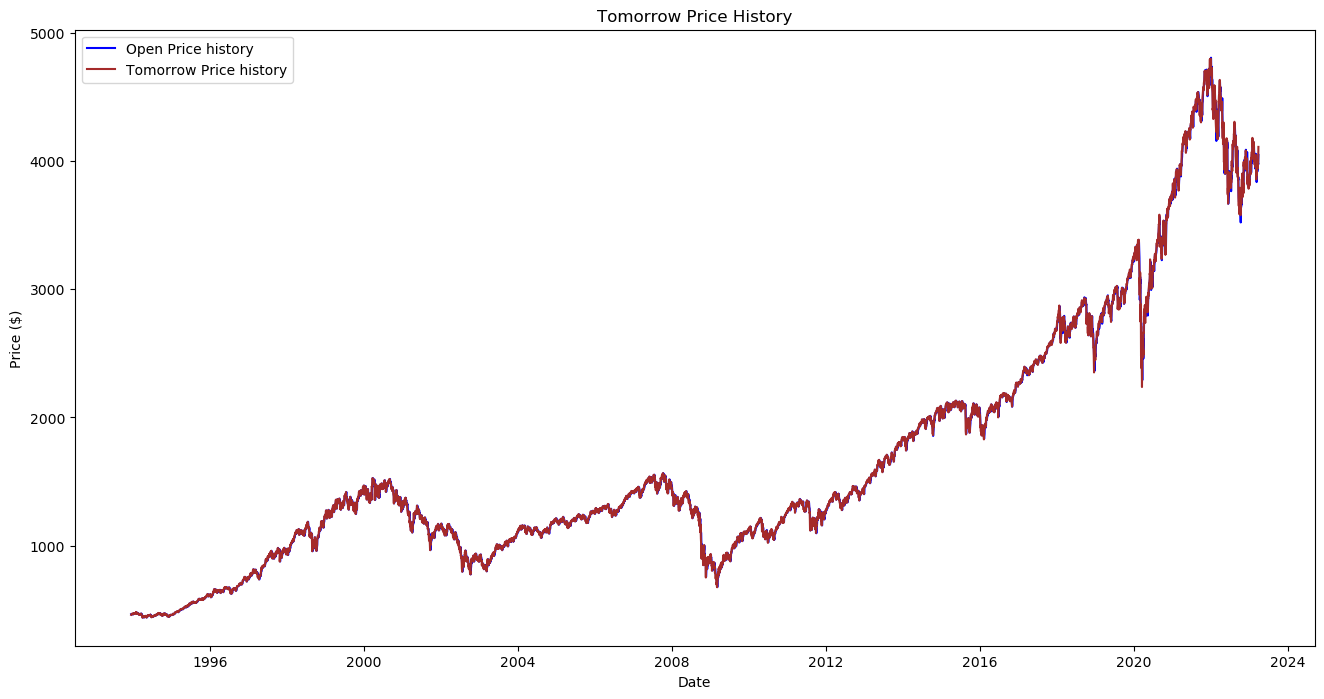

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("modified_data.csv")

# Convert Date column to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.set_index('Date', inplace=True)

# Plot Close price history
plt.figure(figsize=(16, 8))
plt.plot(df['Open'], label='Open Price history', color='blue')
plt.title('Open Price History')

plt.plot(df['Tomorrow'], label='Tomorrow Price history', color= 'brown')
plt.title('Tomorrow Price History')

plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()